C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\4156057736.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Country"] = encoder.fit_transform(X["Country"])
C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\4156057736.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\4156057736.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

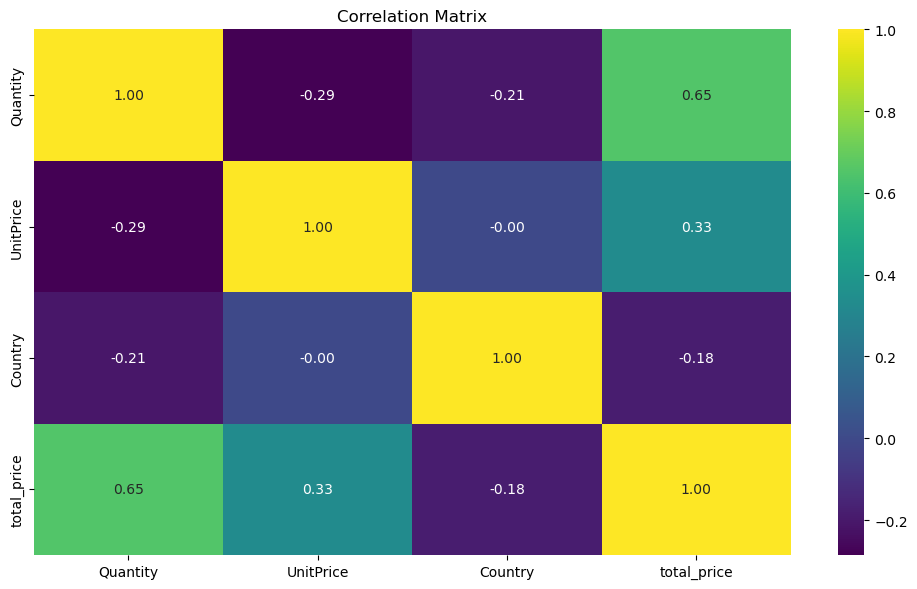

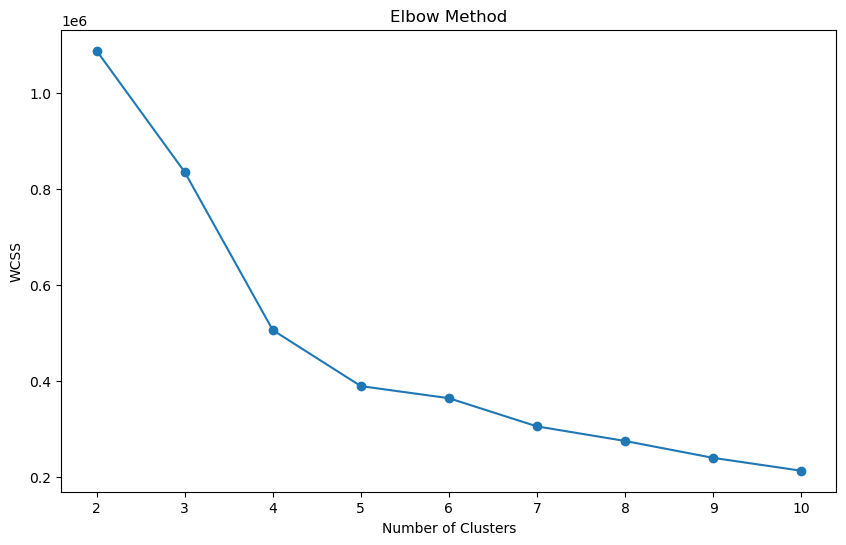

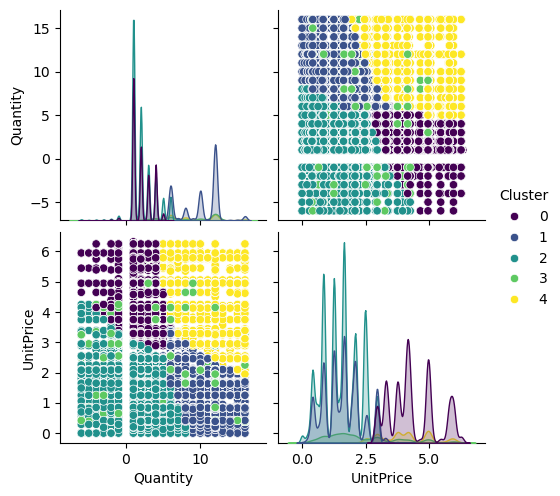

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Load data
df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

df.drop_duplicates(inplace=True)

def remove_non_existent_country(text):
    if text == "Israel":
        text = "Palestine"
    return text

df["Country"] = df["Country"].apply(remove_non_existent_country)

q1 = df["Quantity"].quantile(0.30)
q3 = df["Quantity"].quantile(0.70)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Quantity"] < upper_limit) & (df["Quantity"] > lower_limit)]

q1 = df["UnitPrice"].quantile(0.25)
q3 = df["UnitPrice"].quantile(0.65)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["UnitPrice"] < upper_limit) & (df["UnitPrice"] > lower_limit)]

X = df[["Quantity", "UnitPrice", "Country"]]

encoder = LabelEncoder()

X["Country"] = encoder.fit_transform(X["Country"])

X.dropna(inplace=True)

X["total_price"] = X["Quantity"] * X["UnitPrice"]

corr = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

scaler = StandardScaler()

X = scaler.fit_transform(X)

wcss = []
for i in range(2, 11):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    # Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

sns.pairplot(df, hue='Cluster', vars=['Quantity', 'UnitPrice',], palette='viridis')
plt.show()


C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\208170497.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Country"] = encoder.fit_transform(X["Country"])
C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\208170497.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\208170497.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

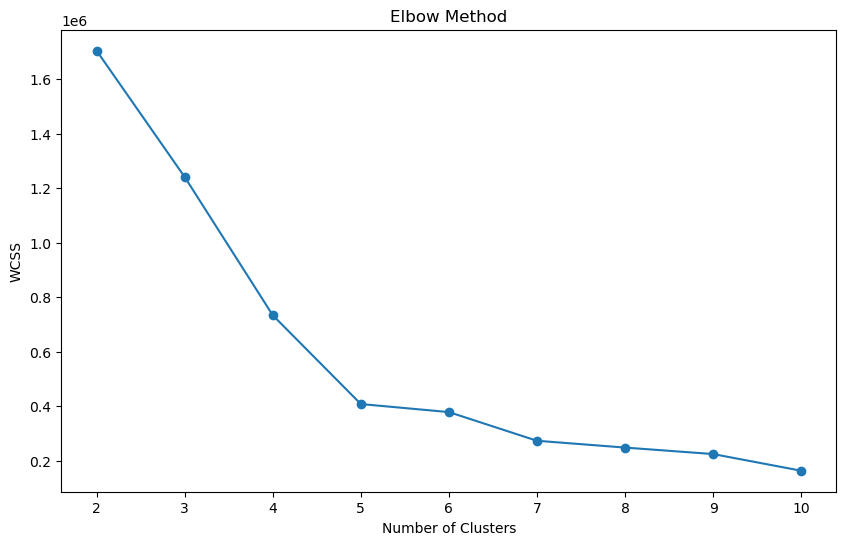

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

X = df[["Quantity", "UnitPrice", "Country"]]

encoder = LabelEncoder()

X["Country"] = encoder.fit_transform(X["Country"])

X.dropna(inplace=True)

X.isnull().sum()

X["total_price"] = X["Quantity"] * X["UnitPrice"]

scaler = StandardScaler()

X = scaler.fit_transform(X)

wcss = []
for i in range(2, 11):
    kmeans = KMeans(i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


    # Elbow Curve Plotting here
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\266610338.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Country"] = encoder.fit_transform(X["Country"])
C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\266610338.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\266610338.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

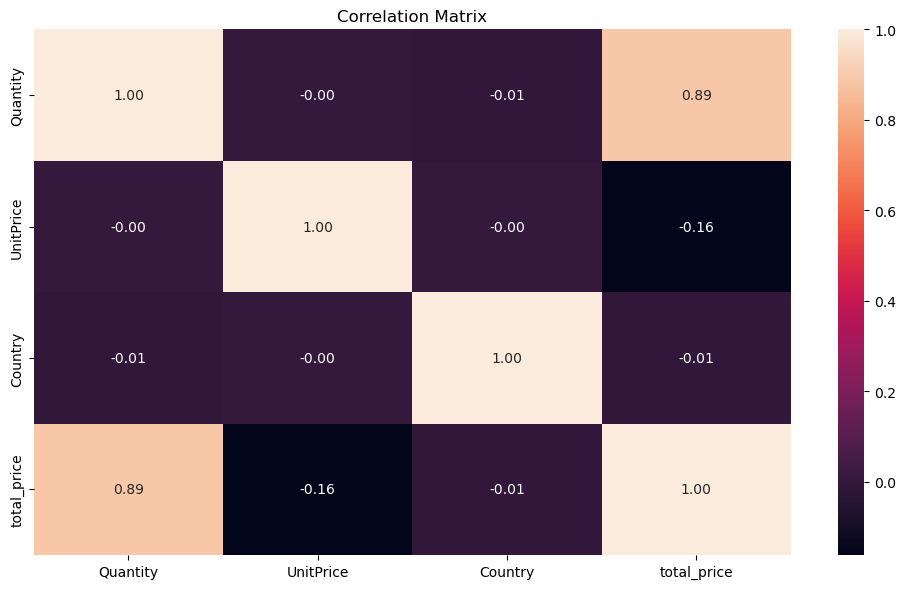

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

X = df[["Quantity", "UnitPrice", "Country"]]

encoder = LabelEncoder()

X["Country"] = encoder.fit_transform(X["Country"])

X.dropna(inplace=True)

X.isnull().sum()

X["total_price"] = X["Quantity"] * X["UnitPrice"]

corr = X.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="rocket")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

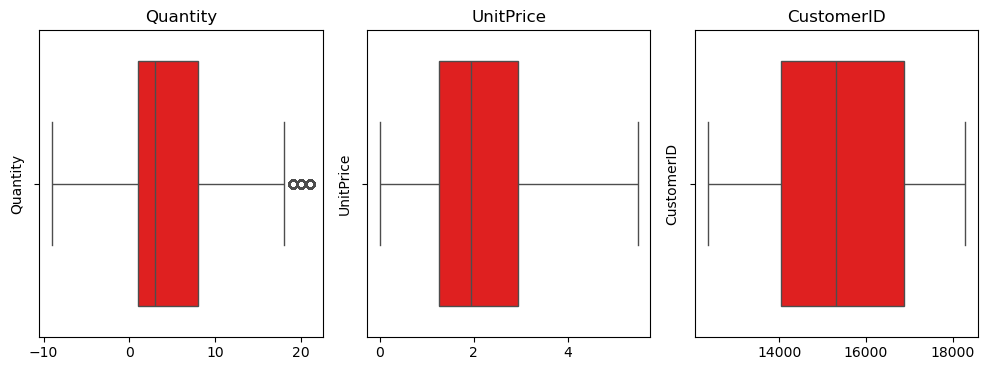

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

q1 = df["UnitPrice"].quantile(0.25)
q3 = df["UnitPrice"].quantile(0.65)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["UnitPrice"] < upper_limit) & (df["UnitPrice"] > lower_limit)]

q1 = df["Quantity"].quantile(0.30)
q3 = df["Quantity"].quantile(0.70)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Quantity"] < upper_limit) & (df["Quantity"] > lower_limit)]

plt.figure(figsize=(10, 4))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x=df[feature], color='blue')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(f'{feature}')
plt.tight_layout()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

q1 = df["UnitPrice"].quantile(0.25)
q3 = df["UnitPrice"].quantile(0.65)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["UnitPrice"] < upper_limit) & (df["UnitPrice"] > lower_limit)]

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

q1 = df["Quantity"].quantile(0.30)
q3 = df["Quantity"].quantile(0.70)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Quantity"] < upper_limit) & (df["Quantity"] > lower_limit)]

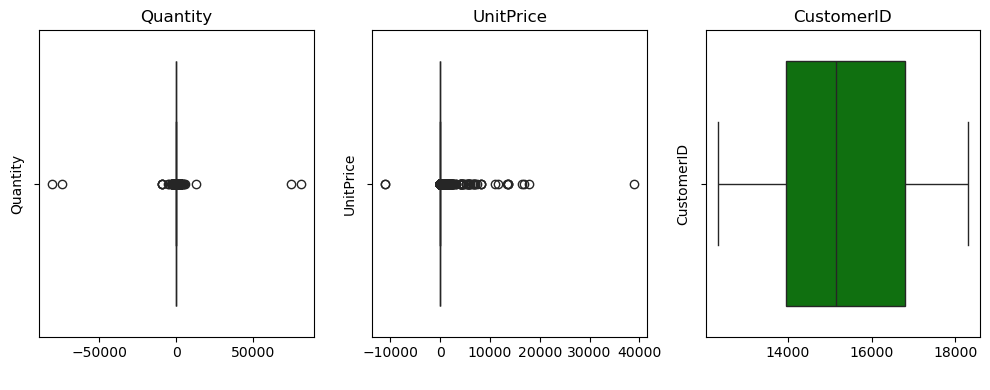

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

plt.figure(figsize=(10,4))
for i , feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x=df[feature], color='green')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(f'{feature}')
    plt.tight_layout()


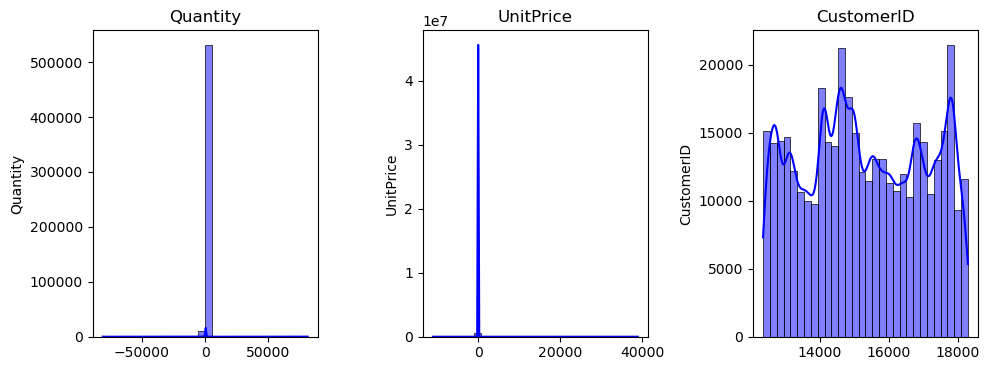

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

plt.figure(figsize=(10,4))
for i , feature in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=df[feature], bins=30, kde=True, color='green')
    plt.title(f'{feature}')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

C:\Users\Heikki\AppData\Local\Temp\ipykernel_15132\2986576397.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_trends.values, y=time_trends.index, palette='magma')


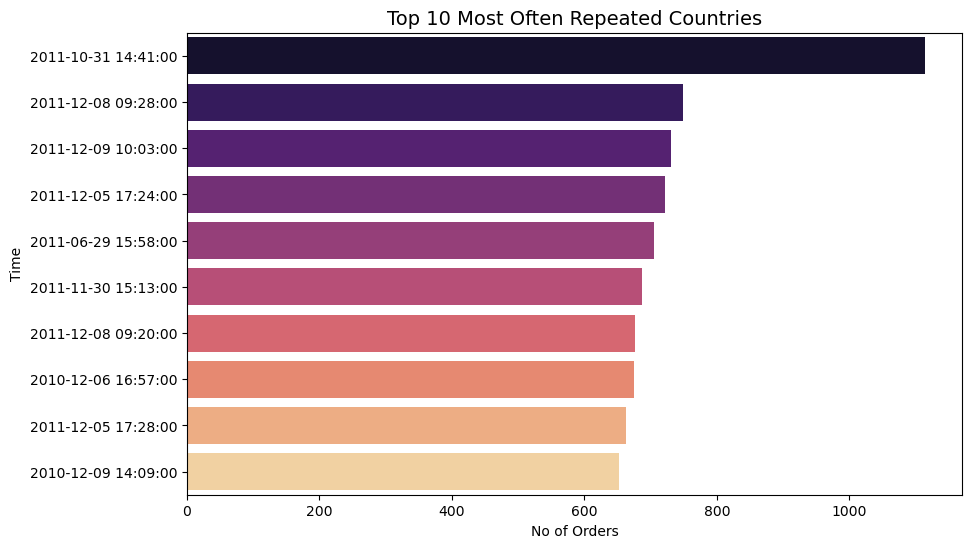

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d.%f')
time_trends = df['InvoiceDate'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=time_trends.values, y=time_trends.index, hue=time_trends.index, palette='magma', legend=False)
plt.title('Top 10 Most Often Repeated Countries', fontsize=14)
plt.xlabel('No of Orders')
plt.ylabel('Time')
plt.show()

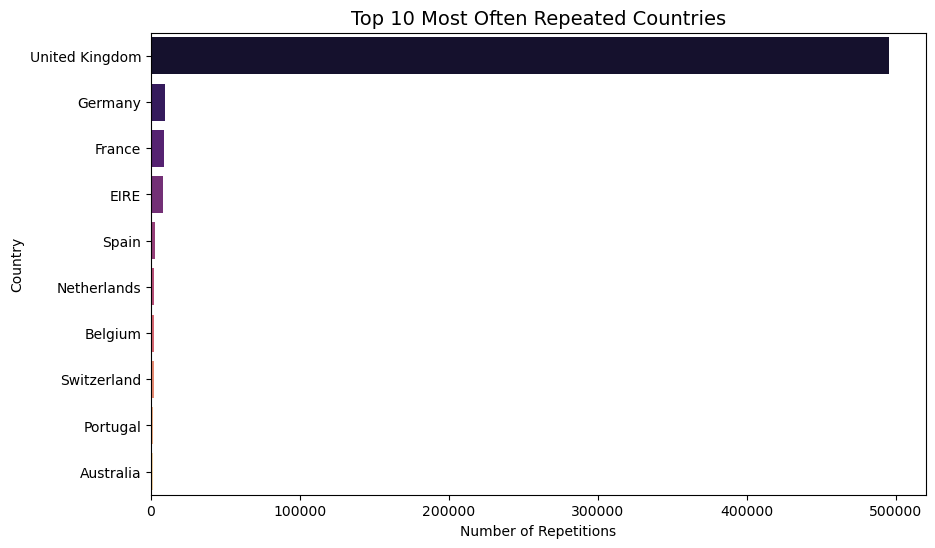

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

country_count = df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index, hue=country_count.index, palette='magma', legend=False)
plt.title("Top 10 Most Often Repeated Countries", fontsize=14)
plt.xlabel("Number of Repetitions")
plt.ylabel("Country")
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')
des = df.describe().transpose()
palette = sns.color_palette("crest", as_cmap=True)
des.style.background_gradient(cmap=palette)


,count,mean,min,25%,50%,75%,max,std
Quantity,541909.000000,9.552250,-80995.000000,1.000000,3.000000,10.000000,80995.000000,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,nan
UnitPrice,541909.000000,4.611114,-11062.060000,1.250000,2.080000,4.130000,38970.000000,96.759853
CustomerID,406829.000000,15287.690570,12346.000000,13953.000000,15152.000000,16791.000000,18287.000000,1713.600303


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

df = pd.read_excel(r'C:/Users/Heikki/Documents/Portfolio/Data/Online Retail.xlsx')

df.head()
df.columns
df. shape
df.dtypes
df.info()
np.sum(df.isnull().any(axis=1))
print('length of data is', len(df))
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))
df.duplicated().sum()

des = df.describe().transpose()
palette = sns.color_palette("crest", as_cmap=True)
des.style.background_gradient(cmap=palette)

country_count = df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_count.values, y=country_count.index, hue=country_count.index, palette='magma', legend=False)
plt.title("Top 10 Most Often Repeated Countries", fontsize=14)
plt.xlabel("Number of Repetitions")
plt.ylabel("Country")
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
length of data is 541909
Count of columns in the data is:   8
Count of rows in the data is:   541909


5268